        income  name_email_similarity  prev_address_months_count  \
0          0.3               0.986506                         -1   
1          0.8               0.617426                         -1   
2          0.8               0.996707                          9   
3          0.6               0.475100                         11   
4          0.9               0.842307                         -1   
...        ...                    ...                        ...   
999995     0.8               0.124690                         -1   
999996     0.9               0.824544                         -1   
999997     0.8               0.140891                         -1   
999998     0.9               0.002480                         52   
999999     0.6               0.993391                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 25            40            0.006735   
1                                 8

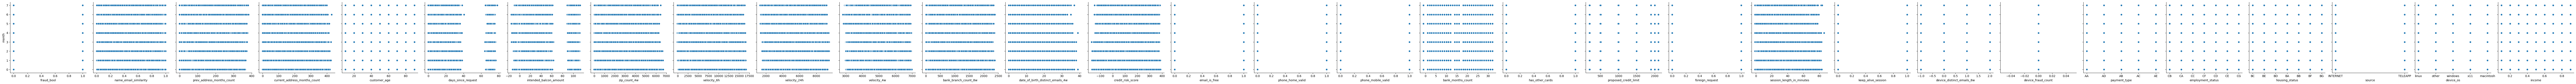

Training set accuracy:
MSE:  0.010548535479801675
R-squared score:  0.03287589235284172
Testing set accuracy:
MSE:  0.010558420091145108
R-squared score:  0.03207811983539144


In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[6]:


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


# # Data Collection and Analysis

# In[7]:


ccfraud_dataset = pd.read_csv('C:\\Users\\USER\\Base.csv')


# In[8]:


ccfraud_dataset.head()


# In[9]:


ccfraud_dataset.shape


# In[10]:


ccfraud_dataset.describe()


# In[11]:


ccfraud_dataset['fraud_bool'].value_counts()


# In[12]:


ccfraud_dataset.groupby('fraud_bool').mean()


# In[13]:


X = ccfraud_dataset.drop(columns='fraud_bool',axis=1)
Y = ccfraud_dataset['fraud_bool']


# In[14]:


print(X)


# In[15]:


print (Y)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Let's say X contains both numerical and categorical features
# For demonstration purposes, I'll assume 'categorical_column' is your categorical feature

# Define the indices or names of the categorical columns
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
numeric_columns = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
# Define the preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values if any
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values if any
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine the preprocessing steps for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),  # Apply numeric transformer to numeric columns
        ('cat', categorical_transformer, categorical_columns)  # Apply categorical transformer to categorical columns
    ])

# Define the full pipeline including preprocessing and scaling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on your data and transform it
standardized_data = pipeline.fit_transform(X)

# Print the standardized data
print(standardized_data)


# In[20]:


X = standardized_data
Y = ccfraud_dataset['fraud_bool']


# In[21]:


print(X)
print(Y)


# ## Splitting between training and test data

# In[22]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , stratify=Y, random_state=2)


# In[23]:


print(X.shape, X_train.shape, X_test.shape)


# In[28]:


import matplotlib.pyplot as plt
import seaborn as sns


# In[98]:


sns.pairplot(ccfraud_dataset, x_vars=['fraud_bool', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os','income'], y_vars='month', height=4, aspect=1, kind='scatter')
plt.show()


# # Training the Model

# In[88]:


# Create a linear regression object
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, Y_train)


# In[89]:


# Predict the target variable for the test data
Y_pred = lr.predict(X_test)


# In[96]:


# Calculate the accuracy scores
mse_train = np.mean((Y_train - lr.predict(X_train)) ** 2)
mse_test = np.mean((Y_test - Y_pred) ** 2)
r2_train = lr.score(X_train, Y_train)
r2_test = lr.score(X_test, Y_test)

# Print the accuracy scores
print("Training set accuracy:")
print("MSE: ", mse_train)
print("R-squared score: ", r2_train)

print("Testing set accuracy:")
print("MSE: ", mse_test)
print("R-squared score: ", r2_test)


# In[ ]:



